In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Importing Iris dataset into a Dataframe df

In [22]:
df=pd.read_csv('/content/drive/MyDrive/IRIS.csv')

In [23]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.shape

(150, 5)

# EDA

In [26]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Species', ylabel='count'>

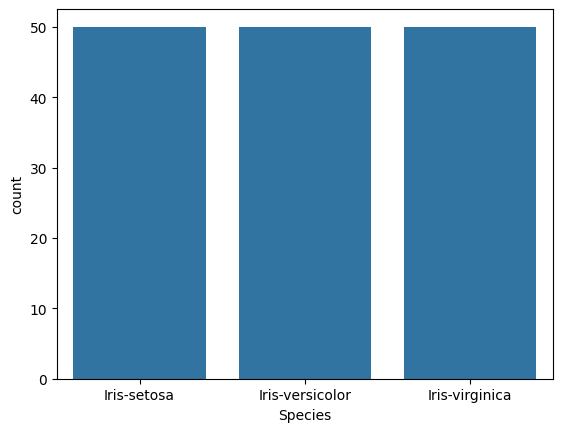

In [49]:
sns.countplot(x=df['Species'])

<Axes: xlabel='Sepal_Length', ylabel='Count'>

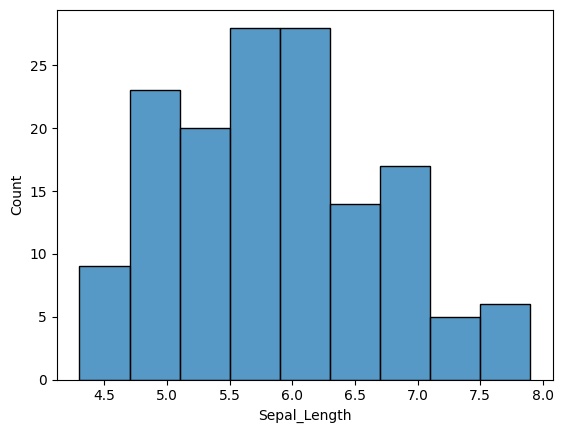

In [31]:
sns.histplot(df['Sepal_Length'])

<Axes: ylabel='Petal_Length'>

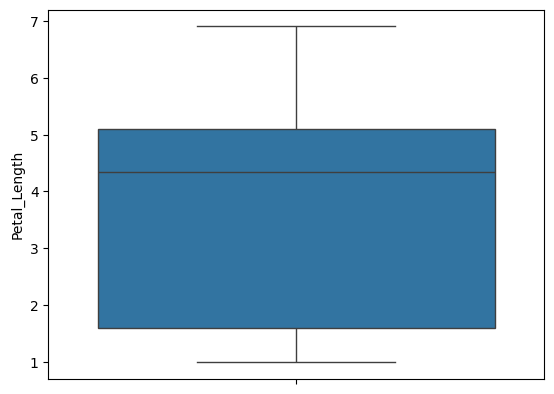

In [32]:
sns.boxplot(df['Petal_Length'])

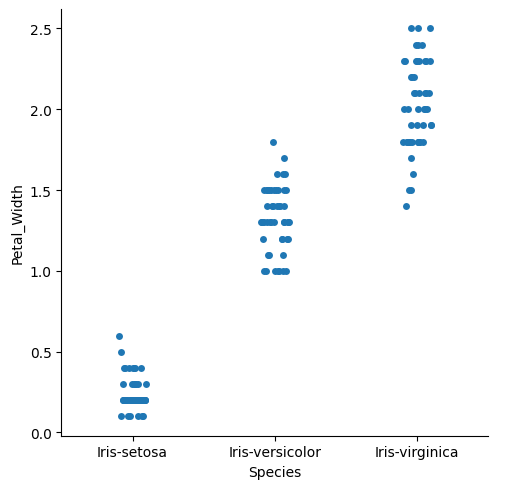

In [35]:
sns.catplot(x='Species',y='Petal_Width',data=df)

<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

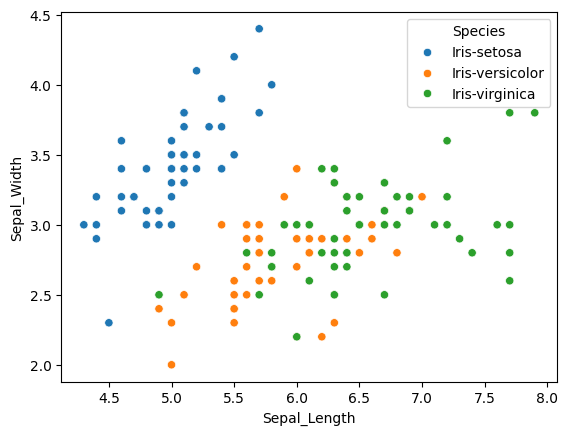

In [46]:
sns.scatterplot(x=df['Sepal_Length'],y=df['Sepal_Width'],hue=df['Species'])

<Axes: xlabel='Petal_Length', ylabel='Petal_Width'>

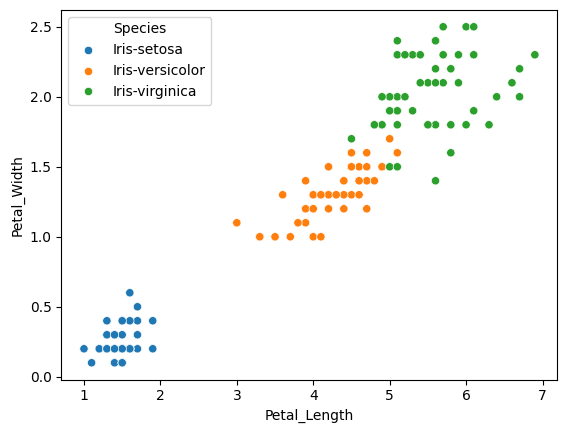

In [41]:
sns.scatterplot(x=df['Petal_Length'],y=df['Petal_Width'],hue=df['Species'])

# ML Model

In [50]:
x=df[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]
y=df['Species']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [53]:
print(x_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [54]:
print(x_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [55]:
x_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
118,7.7,2.6,6.9,2.3
141,6.9,3.1,5.1,2.3
26,5.0,3.4,1.6,0.4
43,5.0,3.5,1.6,0.6
59,5.2,2.7,3.9,1.4


In [56]:
y_train.head()

118     Iris-virginica
141     Iris-virginica
26         Iris-setosa
43         Iris-setosa
59     Iris-versicolor
Name: Species, dtype: object

In [57]:
x_test.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2


In [58]:
y_test.head()

87     Iris-versicolor
111     Iris-virginica
10         Iris-setosa
91     Iris-versicolor
49         Iris-setosa
Name: Species, dtype: object

In [62]:
from sklearn.svm import SVC
model=SVC(kernel='linear')

In [63]:
model=model.fit(x_train,y_train)

In [64]:
model

SVC(kernel='linear')

In [79]:
y_pred_train = model.predict(x_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_train,y_train)

0.9821428571428571

In [65]:
y_pred=model.predict(x_test)

In [69]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [70]:
y_test[0:5]

87     Iris-versicolor
111     Iris-virginica
10         Iris-setosa
91     Iris-versicolor
49         Iris-setosa
Name: Species, dtype: object

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 12]])

In [74]:
from sklearn.metrics import recall_score
recall_score(y_pred,y_test,average='macro')

1.0

In [75]:
from sklearn.metrics import precision_score
precision_score(y_pred,y_test,average='macro')

1.0

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

